# Components of Machine Learning

## Definitions

Machine Learning can be broken down into a few concepts, we will look at examples of each and discuss some of the nuances as we go.

* Model: Some representation of a solution. Can be an equation, image template, some format that encapsulates our method of solving the problem at hand.
* Parameters: Control values that are specific inputs into our model. They can be things like coefficents to the equation that is the model, weights, or other descriptors.
* Loss Function: Some method of measuring how far off an output is front some measure of truth. This can be things like distance (imagine measuring how far a dart is from a bullseye)
* Optimizer: Method for determining how to tweak our parameters to reduce our loss function.

You can think of the goal of machine learning is to start with some **model** we believe can solve a problem. We then determine the specific **parameters** that are part of the model which produces the smallest **loss** by using our **optimizer**.

## Basic Example

Lets put this into context using a basic statisical tool. Linear Regression.

We will begin by generating some vaguely linear data with noise.

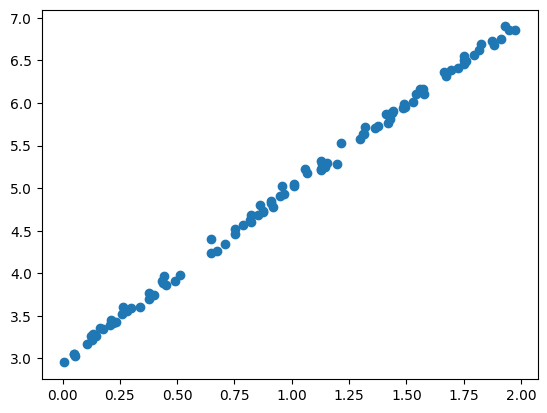

In [1]:
# Linear algebra library
import numpy as np

# Visualization library
from matplotlib import pyplot as plt

# Our x data is going to be number 0 - 2
x = 2 * np.random.rand(100, 1)

# We will then make a basic linear function following y = mx + b
y = 2 * x.ravel() + 3

# But to make things more interesting, lets add some Guassian noise (mean of 0 and standard deviation of 0.05)
noise = np.random.normal(0, 0.05, len(x))

# And produce our final, noisy y-values
y_noisy = y + noise

# Let's see our data
plt.plot(x, y_noisy, 'o')

So our goal will be to learn a "model" that represents our data. Now since we generated the data we know it is linear. But if we didn't we would start with our best judgement.
Applying the vocab words from above we get this.

* Model: Our model will be the slop-intercept form of a line `y = mx + b`
* Parameters: For our model, the parameters are `m` and `b`. That is what we are trying to find
* Loss Function: The loss will be squared error which will be how far our model + parameters are off from the actual data
* Optimizer: For this case we will use stochastic gradient descent. We will talk a bit more about what that means in a second

Optimizers
* Gradient descent is a method of finding the minimum (or possible maximum) value by iteratively updating parameters based on the gradient of the loss function.
* Stochastic gradient descent is gradient descent where a sub-portion of our test points are used for calculating the loss




Equation: y = 2.30x + 2.64


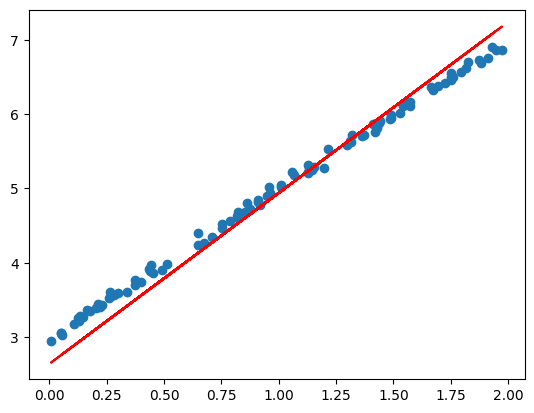

In [2]:
from sklearn.linear_model import SGDRegressor
import matplotlib.pyplot as plt

# Create the linear regression model
model = SGDRegressor(max_iter=1000, tol=1e-3)

# Train the model on the train dataset
model.fit(x, y_noisy)

# Lets see what parameters the regressor came up with
slope = model.coef_[0]
intercept = model.intercept_[0]
print(f'Equation: y = {slope:.2f}x + {intercept:.2f}')

# Lets plop the expected vs actual
plt.scatter(x, y_noisy)

test_predictions = model.predict(x)
plt.plot(x.ravel(), test_predictions.astype(float), color="red")


## Overfitting and Test/Train Splits

This will produce a working solution, but this approach is susceptible to a problem in data science and machine learning called "overfitting". Remember the objective is to find a model that generally applies to examples we will find out in the wild and not just on the data we have available to us.

Let's apply this basic example to the real world to see the problem of overfitting.

> You are producing a model that should predict the price of a house in Beacon Hill based on the square footage. You have data on previous house prices from Zillow.

We could apply our linear regression model in order to try to get a fit, but if we push our model to perfectly fit our test data, we may actually have a model that doesn't perform as well on real world data.

In order to evaluate our model more holistically, we typically take our initial data and perform a "test, train split". All that means is we take our data, split it into two categorites. "Training data" is what we will provide to the fit operation, allowing the optimizer to update our parameters. When then evaluate our model on our "test data" which doesn't impact our parameters and instead is just used as a benchmark to evaluate performace.

Below is the code tweaked to make use of a test/train split.

Equation: y = 2.34x + 2.60
Error:  0.1905908752320876
Percent Error:  0.044179325502894315


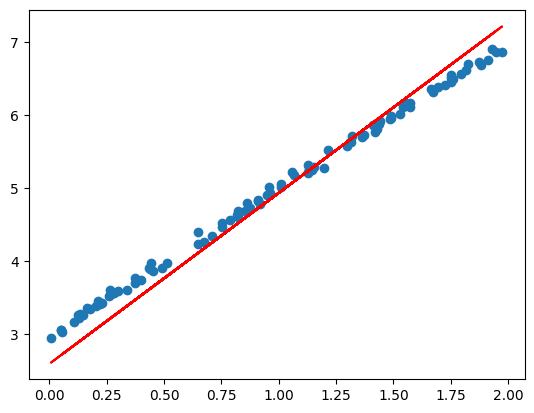

In [3]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error

# Create the linear regression model
model = SGDRegressor(max_iter=1000, tol=1e-3)

# Split our data into a test and train set
x_train, x_test, y_train, y_test = train_test_split(x, y_noisy, test_size=0.2)

# Train the model on the train dataset
model.fit(x_train, y_train)

# Lets see what parameters the regressor came up with
slope = model.coef_[0]
intercept = model.intercept_[0]
print(f'Equation: y = {slope:.2f}x + {intercept:.2f}')

# Lets plop the expected vs actual
plt.scatter(x, y_noisy)

test_predictions = model.predict(x)
plt.plot(x.ravel(), test_predictions.astype(float), color="red")

# Now we can measure the performance using our test data
test_predictions = model.predict(x_test)
mean_error = mean_absolute_error(y_test, test_predictions)
percent_error = mean_absolute_percentage_error(y_test, test_predictions)
print('Error: ', mean_error)
print('Percent Error: ', percent_error)


Before we move on, its worth noting that our "x" data doesn't have to be a single dimension. Linear models can be fit to high-dimensional data. Sklearn's SGDRegressor can handle hundreds of dimensions as input. So if we consider the example of house cost estimation, we could fit a linear model based on square footage, distance to the common, number of bedrooms, number of bathrooms, age of the house, etc.